In [74]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from functools import partial
 
import utils.globals as g
import src.eval.utils as u

from src.methods.methods import calc_methods
from utils.noise import NoiseMachine

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Creating Results

In [99]:
df_up = pd.read_parquet(g.path_tracks)

In [94]:
def add_syn(df, synfuncs, ratio):
    num_samples = round(len(df['seqid'].unique()) * ratio)
    synids = np.array_split(np.random.choice(df['seqid'].unique(), num_samples), len(synfuncs))

    syn_dfs = [df[df['seqid'].isin(synids[i])].groupby('seqid').apply(f).reset_index(drop=True) for i,f in enumerate(synfuncs)]

    return pd.concat(syn_dfs + [df.groupby('seqid').apply(NoiseMachine.no_anomaly).reset_index(drop=True)])

In [105]:
syn_ratio = 0.1
df_in_point         = add_syn(df_up, [partial(NoiseMachine.point_anomaly, num=7)], syn_ratio)
df_in_sinus         = add_syn(df_up, [partial(NoiseMachine.sinusoidal_anomaly, anomlength=0.1)], syn_ratio)
df_in_gaussian      = add_syn(df_up, [partial(NoiseMachine.gaussian_anomaly, stdtimes=0.25)], syn_ratio)


In [107]:
print(len(df_up['seqid'].unique()), len(df_in_point['seqid'].unique()), len(df_in_sinus['seqid'].unique()), len(df_in_gaussian['seqid'].unique()))

2709 2965 2969 2965


In [108]:
df_results_point        = calc_methods(df_in_point, ['scores', 'lof', 'if'], verbose=True)
df_results_sinus        = calc_methods(df_in_sinus, ['scores', 'lof', 'if'], verbose=True)
df_results_gaussian     = calc_methods(df_in_gaussian, ['scores', 'lof', 'if'], verbose=True)

df_results_point.to_parquet(g.data_folder_path + "/tracks_syn_results_point.parquet")
df_results_sinus.to_parquet(g.data_folder_path + "/tracks_syn_results_sinus.parquet")
df_results_gaussian.to_parquet(g.data_folder_path + "/tracks_syn_results_gaussian.parquet")

calculating scores
lof fitting ['6640-101753-1']
lof fitting ['6640-101755-1']
lof fitting ['6640-101813-1']
lof fitting ['6640-101814-1']
lof fitting ['6640-101831-1']
lof fitting ['6640-101874-1']
lof fitting ['6640-101875-1']
lof fitting ['6640-101952-1']
lof fitting ['6640-101988-1']
lof fitting ['6640-101992-1']
lof fitting ['6640-102008-1']
lof fitting ['6640-102009-1']
lof fitting ['6640-102028-1']
lof fitting ['6640-102053-1']
lof fitting ['6640-102092-1']
lof fitting ['6640-102117-1']
lof fitting ['6640-102118-1']
lof fitting ['6640-102119-1']
lof fitting ['6640-102120-1']
lof fitting ['6640-102121-1']
lof fitting ['6640-102122-1']
lof fitting ['6640-102123-1']
lof fitting ['6640-102138-1']
lof fitting ['6640-102139-1']
lof fitting ['6640-102140-1']
lof fitting ['6640-102148-1']
lof fitting ['6640-102149-1']
lof fitting ['6640-102150-1']
lof fitting ['6640-102151-1']
lof fitting ['6640-102152-1']
lof fitting ['6640-102263-1']
lof fitting ['6640-102423-1']
lof fitting ['6640-10

C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101755-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101813-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101814-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101831-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101874-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101875-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101952-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101988-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101992-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102008-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102009-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102028-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102053-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102092-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102117-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102118-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102119-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102120-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102121-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102122-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102123-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102138-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102139-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102140-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102148-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102149-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102150-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102151-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102152-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102263-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102423-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102453-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102557-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102685-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102705-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102787-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102788-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102789-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102826-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102832-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102834-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102841-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102842-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102851-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102980-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102981-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-103000-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-103055-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-103082-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-103454-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-103455-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-106401-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-106402-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-107361-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-107963-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-108019-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6700-108032-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6700-108033-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6700-108154-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6700-108155-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6700-108184-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6700-108185-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6700-108235-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['7600-100440-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['7600-100465-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['7600-100465-2']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['7600-100498-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


calculating scores
lof fitting ['6640-101753-1']
lof fitting ['6640-101755-1']
lof fitting ['6640-101813-1']
lof fitting ['6640-101814-1']
lof fitting ['6640-101831-1']
lof fitting ['6640-101874-1']
lof fitting ['6640-101875-1']
lof fitting ['6640-101952-1']
lof fitting ['6640-101988-1']
lof fitting ['6640-101992-1']
lof fitting ['6640-102008-1']
lof fitting ['6640-102009-1']
lof fitting ['6640-102028-1']
lof fitting ['6640-102053-1']
lof fitting ['6640-102092-1']
lof fitting ['6640-102117-1']
lof fitting ['6640-102118-1']
lof fitting ['6640-102119-1']
lof fitting ['6640-102120-1']
lof fitting ['6640-102121-1']
lof fitting ['6640-102122-1']
lof fitting ['6640-102123-1']
lof fitting ['6640-102138-1']
lof fitting ['6640-102139-1']
lof fitting ['6640-102140-1']
lof fitting ['6640-102148-1']
lof fitting ['6640-102149-1']
lof fitting ['6640-102150-1']
lof fitting ['6640-102151-1']
lof fitting ['6640-102152-1']
lof fitting ['6640-102263-1']
lof fitting ['6640-102423-1']
lof fitting ['6640-10

C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101755-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101813-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101814-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101831-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101874-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101875-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101952-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101988-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101992-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102008-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102009-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102028-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102053-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102092-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102117-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102118-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102119-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102120-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102121-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102122-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102123-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102138-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102139-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102140-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102148-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102149-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102150-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102151-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102152-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102263-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102423-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102453-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102557-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102685-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102705-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102787-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102788-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102789-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102826-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102832-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102834-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102841-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102842-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102851-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102980-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102981-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-103000-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-103055-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-103082-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-103454-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-103455-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-106401-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-106402-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-107361-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-107963-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-108019-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6700-108032-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6700-108033-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6700-108154-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6700-108155-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6700-108184-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6700-108185-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6700-108235-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['7600-100440-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['7600-100465-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['7600-100465-2']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['7600-100498-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


calculating scores
lof fitting ['6640-101753-1']
lof fitting ['6640-101755-1']
lof fitting ['6640-101813-1']
lof fitting ['6640-101814-1']
lof fitting ['6640-101831-1']
lof fitting ['6640-101874-1']
lof fitting ['6640-101875-1']
lof fitting ['6640-101952-1']
lof fitting ['6640-101988-1']
lof fitting ['6640-101992-1']
lof fitting ['6640-102008-1']
lof fitting ['6640-102009-1']
lof fitting ['6640-102028-1']
lof fitting ['6640-102053-1']
lof fitting ['6640-102092-1']
lof fitting ['6640-102117-1']
lof fitting ['6640-102118-1']
lof fitting ['6640-102119-1']
lof fitting ['6640-102120-1']
lof fitting ['6640-102121-1']
lof fitting ['6640-102122-1']
lof fitting ['6640-102123-1']
lof fitting ['6640-102138-1']
lof fitting ['6640-102139-1']
lof fitting ['6640-102140-1']
lof fitting ['6640-102148-1']
lof fitting ['6640-102149-1']
lof fitting ['6640-102150-1']
lof fitting ['6640-102151-1']
lof fitting ['6640-102152-1']
lof fitting ['6640-102263-1']
lof fitting ['6640-102423-1']
lof fitting ['6640-10

C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101755-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101813-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101814-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101831-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101874-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101875-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101952-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101988-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-101992-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102008-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102009-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102028-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102053-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102092-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102117-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102118-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102119-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102120-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102121-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102122-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102123-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102138-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102139-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102140-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102148-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102149-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102150-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102151-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102152-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102263-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102423-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102453-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102557-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102685-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102705-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102787-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102788-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102789-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102826-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102832-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102834-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102841-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102842-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102851-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102980-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-102981-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-103000-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-103055-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-103082-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-103454-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-103455-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-106401-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-106402-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-107361-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-107963-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6640-108019-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6700-108032-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6700-108033-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6700-108154-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6700-108155-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6700-108184-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6700-108185-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['6700-108235-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['7600-100440-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['7600-100465-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['7600-100465-2']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


if fitting ['7600-100498-1']


C:\Users\Luuk Verkleij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


# Creating Series

In [50]:
df_results_point        = pd.read_parquet(g.data_folder_path + "/tracks_syn_results_point.parquet")
df_results_sinus        = pd.read_parquet(g.data_folder_path + "/tracks_syn_results_sinus.parquet")
df_results_gaussian     = pd.read_parquet(g.data_folder_path + "/tracks_syn_results_gaussian.parquet")

# Plotting Results

In [57]:
df_results_point['if+'] = df_results_point['if'] + 0.5
df_results_sinus['if+'] = df_results_sinus['if'] + 0.5
df_results_gaussian['if+'] = df_results_gaussian['if'] + 0.5

df_results_point['ifinv'] = (1 / (1 - df_results_point['if'])) - 1
df_results_sinus['ifinv'] = (1 / (1 - df_results_sinus['if'])) - 1
df_results_gaussian['ifinv'] = (1 / (1 - df_results_gaussian['if'])) - 1

df_results_point['iflog'] = np.log(1 / (1 - df_results_point['if']))
df_results_sinus['iflog'] = np.log(1 / (1 - df_results_sinus['if'])) 
df_results_gaussian['iflog'] = np.log(1 / (1 - df_results_gaussian['if'])) 



In [70]:
method_columns = ['z', 'mz', 'lof', 'if']
quantile = 0.9
thresholds = [df_results_gaussian[col].quantile(quantile) for col in method_columns]

c:\Users\Luuk Verkleij\Desktop\bodyshop-project\src\eval\utils.py:80: RuntimeWarning: invalid value encountered in divide


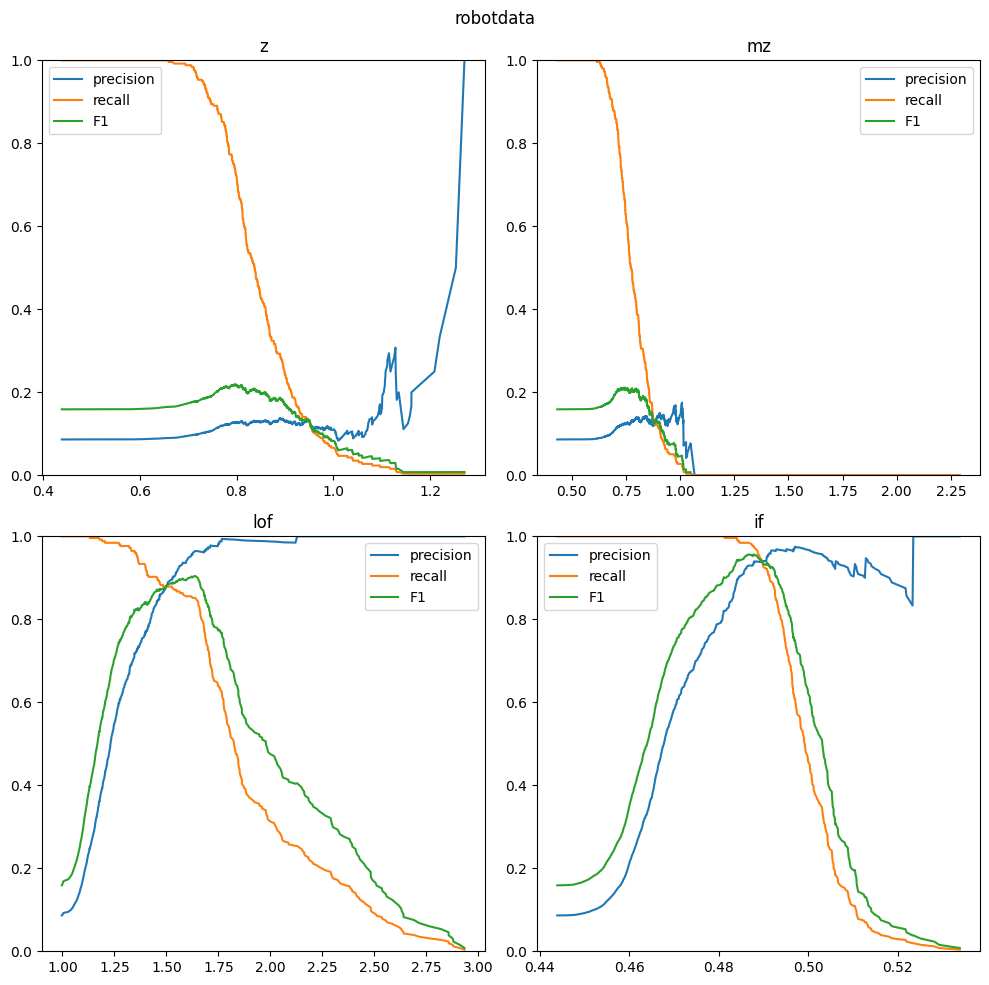

In [78]:

df_series2 = u.aggr_sum(df_results_gaussian, method_columns, normalize=True)
df_series2['anomalous'] = df_series2['seqid'].str.split('|').str[3] != 'original'    

u.plot_rpcurves(df_series2, method_columns, title='robotdata', f1=True)

c:\Users\Luuk Verkleij\Desktop\bodyshop-project\src\eval\utils.py:80: RuntimeWarning: invalid value encountered in divide


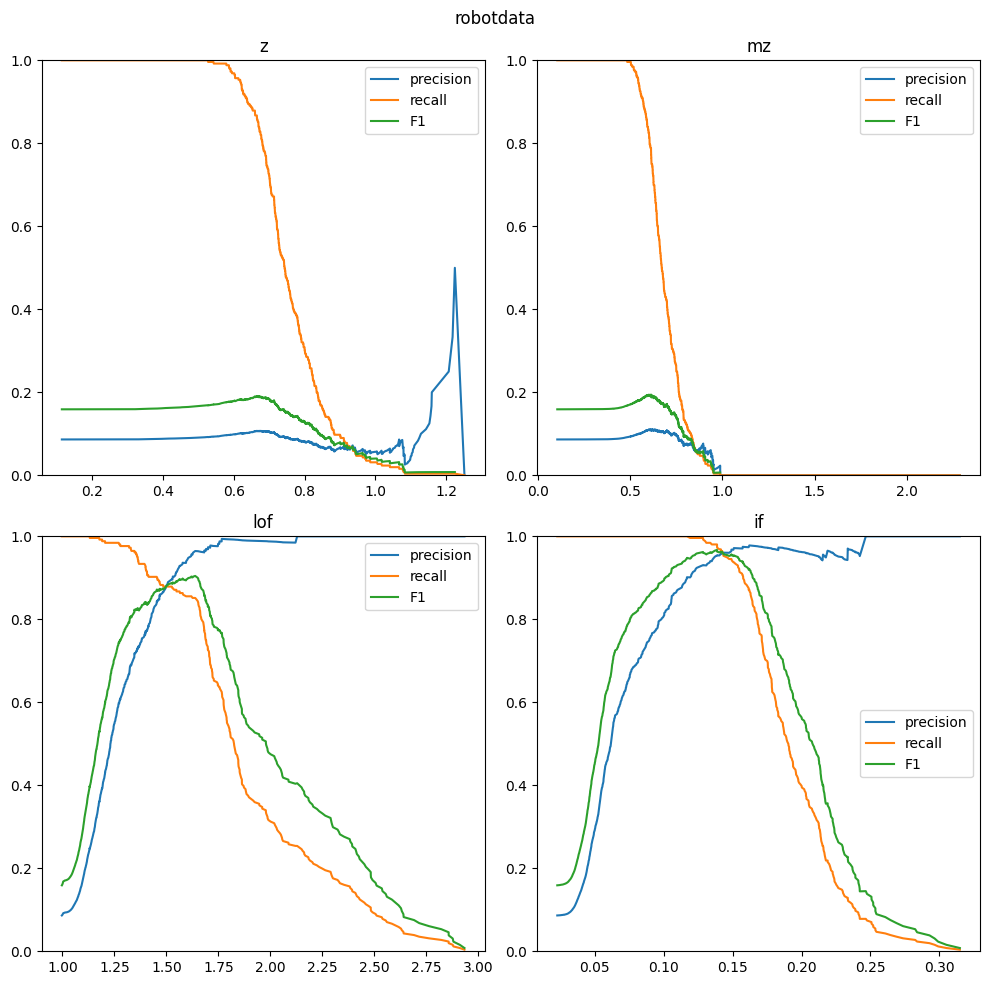

In [76]:
df_series2 = u.aggr_sum_threshold_crossings(df_results_gaussian, method_columns, thresholds, normalize=True)
df_series2['anomalous'] = df_series2['seqid'].str.split('|').str[3] != 'original'    

u.plot_rpcurves(df_series2, method_columns, title='robotdata', f1=True)

In [ ]:
df_series2 = u.aggr_squaredsum(df_results_sinus, method_columns, normalize=True)
df_series2['anomalous'] = df_series2['seqid'].str.split('|').str[3] != 'original'    

u.plot_rpcurves(df_series2, method_columns, title='robotdata', f1=True)


c:\Users\Luuk Verkleij\Desktop\bodyshop-project\src\eval\utils.py:70: RuntimeWarning: invalid value encountered in divide
  axis.plot(prcurve[2], 2 * (prcurve[0][:-1]*prcurve[1][:-1])/(prcurve[0][:-1] + prcurve[1][:-1]), label="F1")


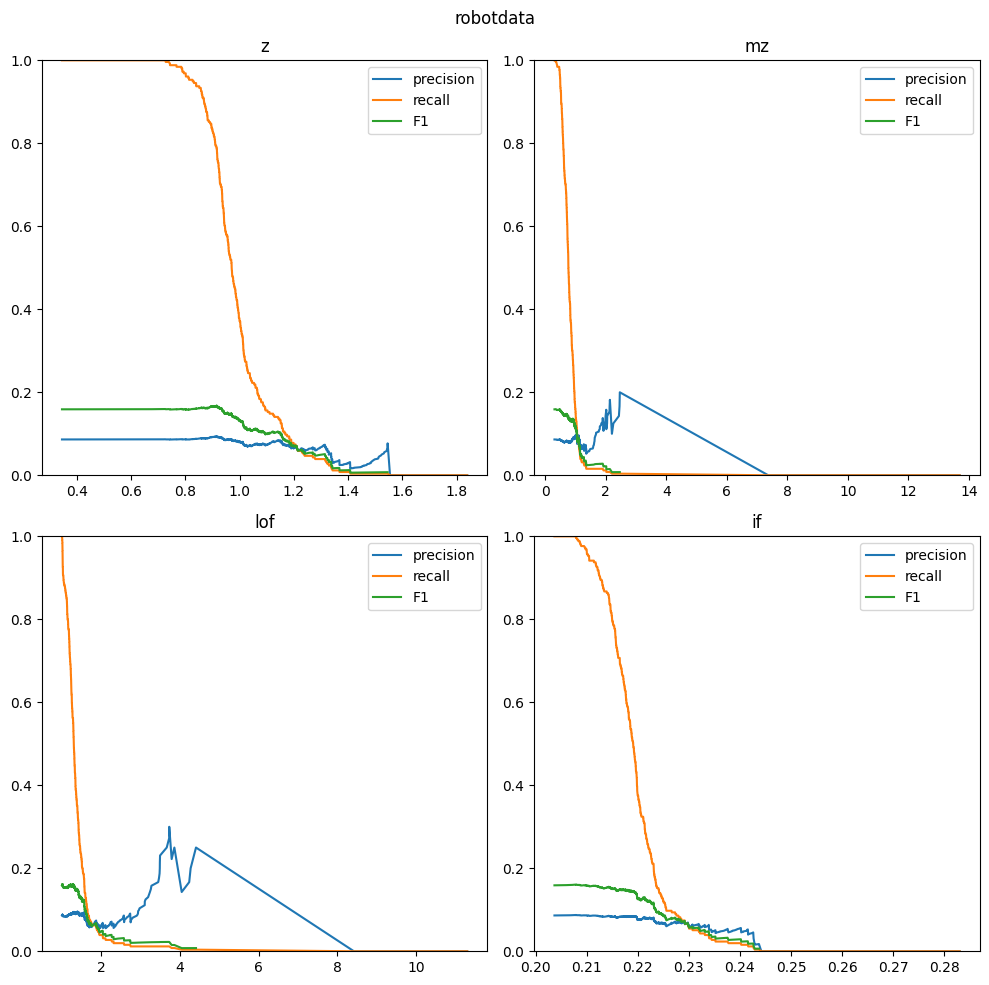

In [71]:
df_series2 = u.aggr_squaredsum(df_results_point, method_columns, normalize=True)
df_series2['anomalous'] = df_series2['seqid'].str.split('|').str[3] != 'original'    

u.plot_rpcurves(df_series2, method_columns, title='robotdata', f1=True)